# Project - 1       

# PRCP-1025-FlightPricePrediction

### Problem Defination

## Attribute Information
**The various features of the dataset explained below**

1. Airline: So this column will have all the types of airlines like Indigo, Jet Airways,
Air India, and many more.
2. Date_of_Journey: This column will let us know about the date on which the
passenger’s journey will start.
3. Source: This column holds the name of the place from where the passenger’s
journey will start.
4. Destination: This column holds the name of the place to where passengers
wanted to travel.
5. Route: Here we can know about what the route is through which passengers
have opted to travel from his/her source to their destination.
6. Arrival_Time: Arrival time is when the passenger will reach his/her destination.

7. Duration: Duration is the whole period that a flight will take to complete its
journey from source to destination.
8. Total_Stops: This will let us know in how many places flights will stop there for
the flight in the whole journey.
9. Additional_Info: In this column, we will get information about food, kind of food,
and other amenities.
10. Price: Price of the flight for a complete journey including all the expenses
before onboarding.

## Business Goal
**The goal is to build a regression model to predict the fare of flights based on various features and analysis. Which will help the customers make informed decisions and airlines optimize pricing strategies.**

## Data Exploration

In [2]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
## Loading dataset
data=pd.read_csv('Flight_Fare.csv')

In [109]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [111]:
pd.set_option('display.max_columns',None) ## Used to view all columns

## Profile Report

In [13]:
## This profiling report will provide complete info about data
from ydata_profiling import ProfileReport
Profile = ProfileReport(data, title = "Flight Price Report")
Profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Basic Checks

In [114]:
data ## Checking head and tail

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [116]:
data.shape

(10683, 11)

In [118]:
data.info() ## Information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [120]:
data.describe(include='O').T ## Descriptive statistics summary

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL ? BOM ? COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


# Data Preprocessing

**Checking missing values/null values**

In [124]:
## Checking null vales
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

**As we can observe 2 missing values, so we can directly drop these, as these are very less**

In [127]:
## Dropping null values
data.dropna(inplace=True)

In [129]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

**Converting Date and Time to Numerical Features**

In [132]:
## checking dtypes
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

**The datatype of Date_of_journey is object. So we will split dates into components like day and month.**

In [135]:
## Extracing day from Date_of_Journey and assigning to new variable
data['Journey_day'] = pd.to_datetime(data.Date_of_Journey,format='%d/%m/%Y').dt.day

In [137]:
## Extracting month from Date_of_Journey and assigning to new variable
data['Journey_Month'] = pd.to_datetime(data.Date_of_Journey,format='%d/%m/%Y').dt.month

In [139]:
## Dropping Date_of_Journey
data.drop('Date_of_Journey', axis = 1, inplace=True)

In [141]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


**Here also the dataype of Arrival_time and Dept_time features are object. So we will split times into components hour and minutes**

In [144]:
## Extracting hour from Dep_Time and assigning to new variable
data['Dept_Hour'] = pd.to_datetime(data['Dep_Time']).dt.hour

In [146]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dept_Hour
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,19
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,20
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,8
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,11


In [148]:
## Extracting minutes from Dep_Time and assigning to new variable
data['Dept_Min'] = pd.to_datetime(data.Dep_Time).dt.minute

In [150]:
data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dept_Hour,Dept_Min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [152]:
## Dropping Dept_time
data.drop('Dep_Time', axis=1, inplace=True)

In [154]:
data

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dept_Hour,Dept_Min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU ? BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR ? DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [156]:
## Extracting hour from Arrival_Time and assigning to new variable
data['Arrival_Time_Hour'] = pd.to_datetime(data.Arrival_Time).dt.hour

In [157]:
data

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dept_Hour,Dept_Min,Arrival_Time_Hour
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55,22
10679,Air India,Kolkata,Banglore,CCU ? BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45,23
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,11:20,3h,non-stop,No info,7229,27,4,8,20,11
10681,Vistara,Banglore,New Delhi,BLR ? DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30,14


In [160]:
## Extracting minute from Arrival_Time and assigning to new variable
data['Arrival_Time_Min'] = pd.to_datetime(data.Arrival_Time).dt.minute

In [161]:
data

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dept_Hour,Dept_Min,Arrival_Time_Hour,Arrival_Time_Min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU ? BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,11:20,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR ? DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [164]:
## Dropping Arrival_Time
data.drop('Arrival_Time', axis=1, inplace=True)

In [166]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dept_Hour,Dept_Min,Arrival_Time_Hour,Arrival_Time_Min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU ? BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR ? DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Route              10682 non-null  object
 4   Duration           10682 non-null  object
 5   Total_Stops        10682 non-null  object
 6   Additional_Info    10682 non-null  object
 7   Price              10682 non-null  int64 
 8   Journey_day        10682 non-null  int32 
 9   Journey_Month      10682 non-null  int32 
 10  Dept_Hour          10682 non-null  int32 
 11  Dept_Min           10682 non-null  int32 
 12  Arrival_Time_Hour  10682 non-null  int32 
 13  Arrival_Time_Min   10682 non-null  int32 
dtypes: int32(6), int64(1), object(7)
memory usage: 1001.4+ KB


**Lets Apply pre-processing on duration column.**


In [171]:
duration = list(data['Duration'])

In [173]:
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip() + ' 0m'
        else:
            duration[i]='0h '+ duration[i] 


In [175]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    duration_mins.append(int(duration[i].split(sep = 'm')[0].split()[-1]))
    

In [177]:
data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dept_Hour,Dept_Min,Arrival_Time_Hour,Arrival_Time_Min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU ? BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR ? DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [179]:
data['duration_hours']=duration_hours

In [181]:
data['duration_mins']=duration_mins

In [183]:
## Dropping Duration
data.drop('Duration', axis=1, inplace=True)

In [185]:
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dept_Hour,Dept_Min,Arrival_Time_Hour,Arrival_Time_Min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU ? BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR ? DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


# EDA - Exploratory Data Analysis

In [188]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_Month', 'Dept_Hour',
       'Dept_Min', 'Arrival_Time_Hour', 'Arrival_Time_Min', 'duration_hours',
       'duration_mins'],
      dtype='object')

**Airline vs Price Analysis**

In [191]:
data.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

<Axes: xlabel='Airline', ylabel='Price'>

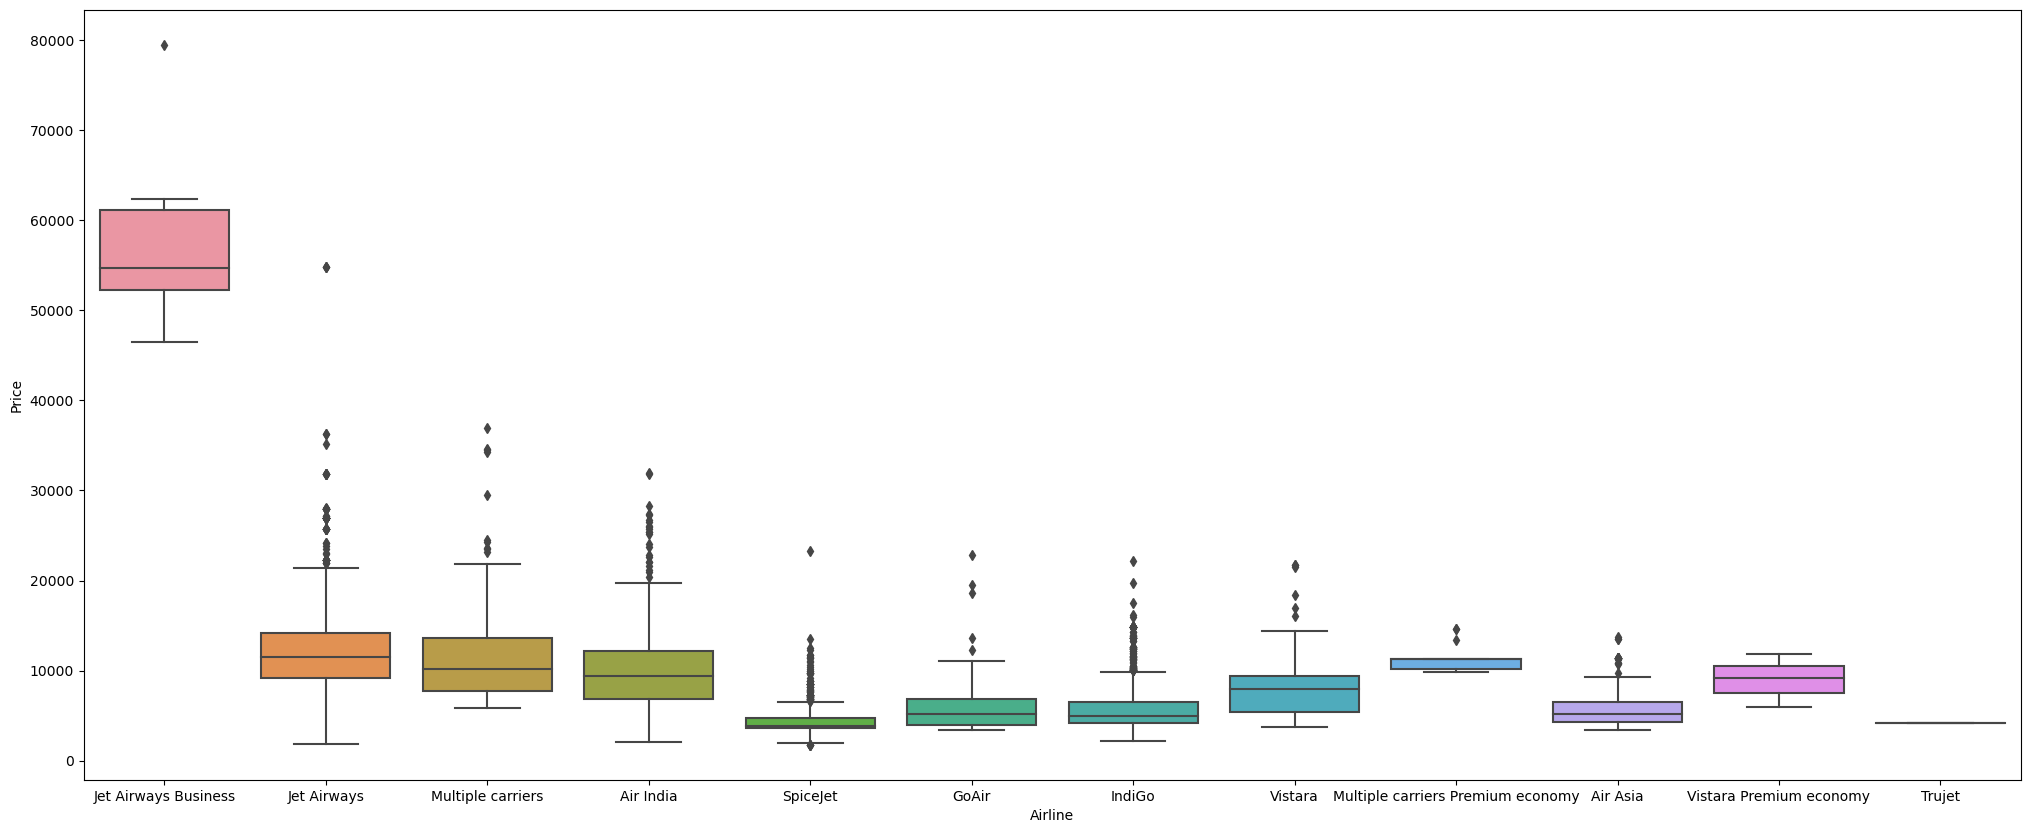

In [193]:
plt.figure(figsize=(25,10))
sns.boxplot(x='Airline',y='Price', data=data.sort_values('Price', ascending=False))

**There are slight differences between each companies on this graph, AirAsia seems to have the cheapest flights when Jet Airways, Multiple camers and Air India are more expensive. However it looks like Jet Airways Business Class are a little more expensive than the Jet Airways Economic Class.**

**Total_stops vs Price Analysis**

In [196]:
data.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

<Figure size 1500x500 with 0 Axes>

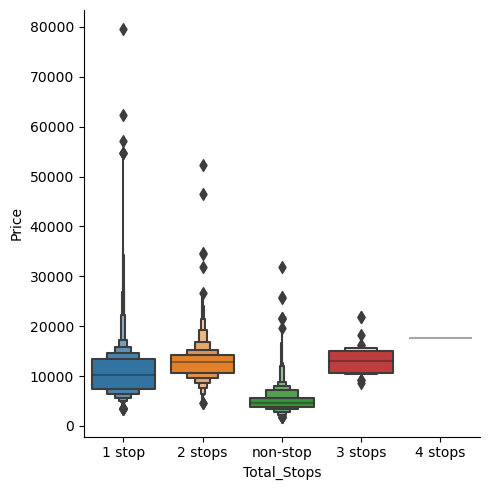

In [197]:
plt.figure(figsize=(15,5))
sns.catplot(x='Total_Stops',y='Price', data=data.sort_values('Price', ascending=False),kind='boxen')

**The majority of flights are 1 stop and followed by 2 stops and non-stop. Non-stop flights tend to be cheaper, prices are highest for 1-stop flights, followed by 2-stop flights, with non-stop flights generally being the most affordable.**


**Source vs Price Analysis**

In [201]:
data.Source.value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

<Figure size 1500x500 with 0 Axes>

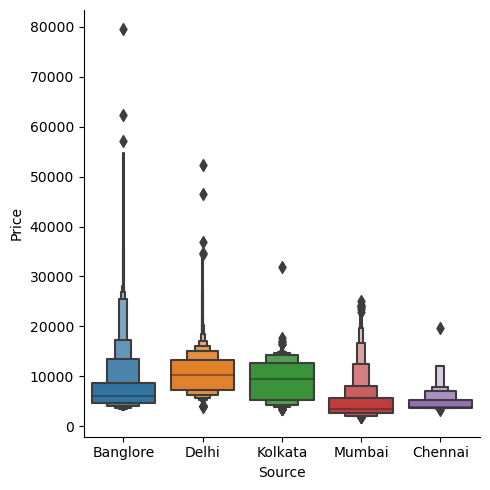

In [202]:
plt.figure(figsize=(15,5))
sns.catplot(x='Source', y='Price', data=data.sort_values('Price', ascending=False),kind='boxen')

**Flights departing from Bangalore tend to have the highest prices, followed by other cities, while Chennai appears to offer more affordable options. Among the sources, Delhi has the highest frequency, followed by Kolkata and Bangalore.**

**Destination vs Price Analysis**

In [206]:
data.Destination.value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

<Figure size 2000x1500 with 0 Axes>

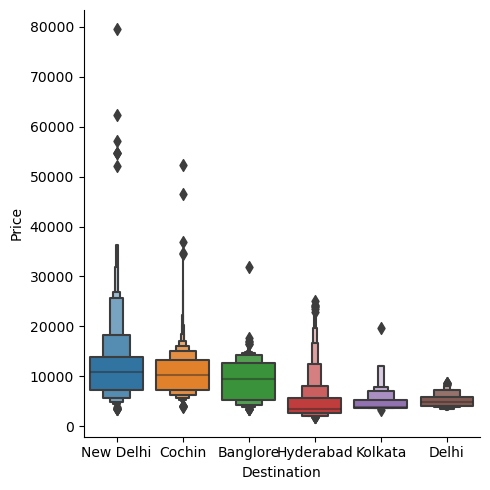

In [207]:
plt.figure(figsize=(20,15))
sns.catplot(x='Destination', y='Price', data=data.sort_values('Price', ascending=False),kind='boxen')

**New Delhi has the highest flight prices, followed by Cochin, while flights to Delhi are more affordable. In terms of destination frequency, Cochin has the most flights, followed by Bangalore and Delhi.**

In [208]:
data

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dept_Hour,Dept_Min,Arrival_Time_Hour,Arrival_Time_Min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU ? BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,non-stop,No info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR ? DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


# Encoding - Handling categorical data

In [212]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_Month', 'Dept_Hour',
       'Dept_Min', 'Arrival_Time_Hour', 'Arrival_Time_Min', 'duration_hours',
       'duration_mins'],
      dtype='object')

In [213]:
## One hot encoding for Airline, Source and Destination
data=pd.get_dummies(data=data,columns=['Airline', 'Source', 'Destination'], drop_first=True)

In [215]:
data.nunique()

Route                                         128
Total_Stops                                     5
Additional_Info                                10
Price                                        1870
Journey_day                                    10
Journey_Month                                   4
Dept_Hour                                      24
Dept_Min                                       12
Arrival_Time_Hour                              24
Arrival_Time_Min                               12
duration_hours                                 44
duration_mins                                  12
Airline_Air India                               2
Airline_GoAir                                   2
Airline_IndiGo                                  2
Airline_Jet Airways                             2
Airline_Jet Airways Business                    2
Airline_Multiple carriers                       2
Airline_Multiple carriers Premium economy       2
Airline_SpiceJet                                2


In [217]:
data.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [222]:
## Manual encoding for Total_Stops
Dict = {'non-stop':0,'1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}
data['Total_Stops']=data['Total_Stops'].map(Dict)

In [224]:
data.Total_Stops.value_counts()

Total_Stops
1    5625
0    3491
2    1520
3      45
4       1
Name: count, dtype: int64

In [226]:
## Manual encoding for Additional_info
data.replace({'No info':0,'No Info':0, 'In-flight meal not included':1,'No check-in baggage included':2, '1 Long layover':3, 'Change airports':4,'Business class':5,\
       '1 Short layover':6,'Red-eye flight':7,'2 Long layover':8}, inplace=True)

In [228]:
data.Additional_Info.value_counts()

Additional_Info
0    8347
1    1982
2     320
3      19
4       7
5       4
6       1
7       1
8       1
Name: count, dtype: int64

In [230]:
data

,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dept_Hour,Dept_Min,Arrival_Time_Hour,Arrival_Time_Min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR ? DEL,0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,CCU ? IXR ? BBI ? BLR,2,0,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,DEL ? LKO ? BOM ? COK,2,0,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,CCU ? NAG ? BLR,1,0,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,BLR ? NAG ? DEL,1,0,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,CCU ? BLR,0,0,4107,9,4,19,55,22,25,2,30,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
10679,CCU ? BLR,0,0,4145,27,4,20,45,23,20,2,35,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
10680,BLR ? DEL,0,0,7229,27,4,8,20,11,20,3,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
10681,BLR ? DEL,0,0,12648,1,3,11,30,14,10,2,40,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True


**Removing the Route Feature**

In [234]:
data.drop('Route', axis=1, inplace=True)

In [236]:
## Removing Duplicates
data.duplicated().sum()

222

In [238]:
## Dropping duplicates
data.drop_duplicates(inplace=True)

In [240]:
## Creating another copy of cleaned data
Final_data=data.copy()

In [242]:

Final_data

,Total_Stops,Additional_Info,Price,Journey_day,Journey_Month,Dept_Hour,Dept_Min,Arrival_Time_Hour,Arrival_Time_Min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,3897,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,0,7662,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,0,13882,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,0,6218,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,0,13302,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,4107,9,4,19,55,22,25,2,30,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
10679,0,0,4145,27,4,20,45,23,20,2,35,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
10680,0,0,7229,27,4,8,20,11,20,3,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
10681,0,0,12648,1,3,11,30,14,10,2,40,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True


## Outliers Handling

## Feature Selection

In [138]:
## Checking correlation
corr_data=data.iloc[:,0:11]

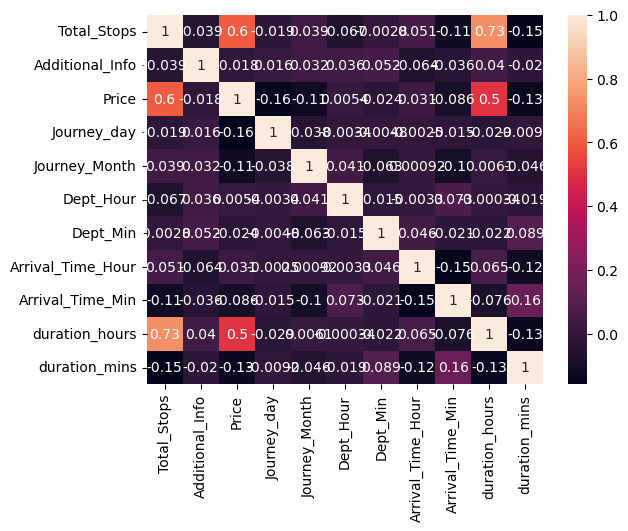

In [140]:
sns.heatmap(corr_data.corr(), annot=True)
plt.rcParams['font.size']=(20)
plt.show()

# Model Creation

In [248]:
## Assigning Independent Variable(X) and Dependent Variable(Y)
X=Final_data.drop('Price', axis=1)
y=Final_data['Price']

In [250]:
X

,Total_Stops,Additional_Info,Journey_day,Journey_Month,Dept_Hour,Dept_Min,Arrival_Time_Hour,Arrival_Time_Min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,24,3,22,20,1,10,2,50,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,0,1,5,5,50,13,15,7,25,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,0,9,6,9,25,4,25,19,0,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,0,12,5,18,5,23,30,5,25,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,0,1,3,16,50,21,35,4,45,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,9,4,19,55,22,25,2,30,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
10679,0,0,27,4,20,45,23,20,2,35,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
10680,0,0,27,4,8,20,11,20,3,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
10681,0,0,1,3,11,30,14,10,2,40,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True


In [252]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10460, dtype: int64

### Splitting data

In [254]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=25)

## Creating model


In [256]:
## Importing Machine Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [258]:
def predict(Reg_model): ## Defining a function
    print(f'Model Name : {Reg_model}') ## Object Creation
    model = Reg_model.fit(X_train,y_train) ## Training the data
    print(f'Training score : {model.score(X_train,y_train)}') ## Training data score
    y_predict = model.predict(X_test) ## Predicting test data
    print(f'predictions are : {y_predict}') ## predicted data
    print('\n')
    r2score=r2_score(y_test,y_predict) 
    print(f'r2score is : {r2score}')
    r2round=round(r2score,2)
    num_row=X_test.shape[0]
    num_col=X_test.shape[1]
    adjusted_r2score=1-(((1-r2round)*(num_row-1))/(num_row-num_col-1))
    print(f'adjusted r2score is : {adjusted_r2score}')
    print(f'MAE : {mean_absolute_error(y_test,y_predict)}')
    print(f'MSE : {mean_squared_error(y_test,y_predict)}')
    print(f'RMSE : {np.sqrt(mean_squared_error(y_test,y_predict))}')

    sns.distplot(y_test-y_predict)




Model Name : LinearRegression()
Training score : 0.6438646013498726
predictions are : [ 6431.61325786 13809.53061461  9055.22578886 ...  3758.03661777
 11156.212783    4182.94440201]


r2score is : 0.6235227041515081
adjusted r2score is : 0.6163308657869327
MAE : 1924.3512465326605
MSE : 7222040.889838384
RMSE : 2687.3855119499294


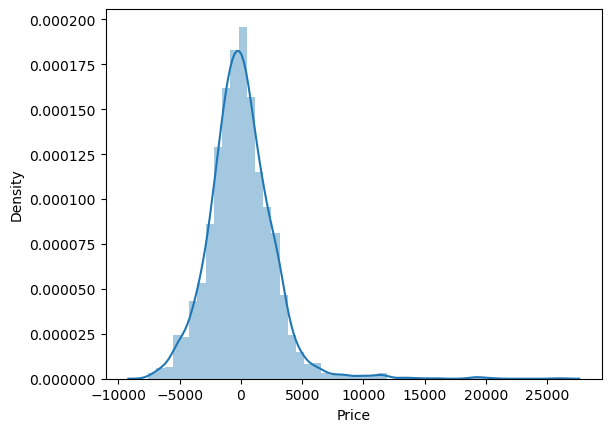

In [260]:
## Linear Regression Model
predict(LinearRegression())

Model Name : SVR()
Training score : -0.0038992142925537987
predictions are : [8092.37393897 8428.0394842  8103.89522704 ... 8181.19303156 8327.27711737
 8067.76507701]


r2score is : 0.003656623389448499
adjusted r2score is : -0.009655616350177088
MAE : 3539.34231794869
MSE : 19113058.57099237
RMSE : 4371.848415829667


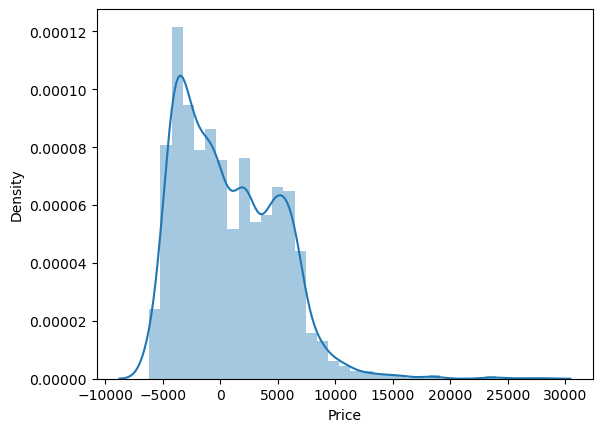

In [262]:
## Support Vector Machine - Regressor Model
predict(SVR())

Model Name : KNeighborsRegressor()
Training score : 0.7338221033909226
predictions are : [ 5120.4 13176.2  5607.  ...  4856.4 13202.2  5537.8]


r2score is : 0.5933780562173638
adjusted r2score is : 0.5860411972964275
MAE : 1844.3497131931167
MSE : 7800311.830452518
RMSE : 2792.903834802143


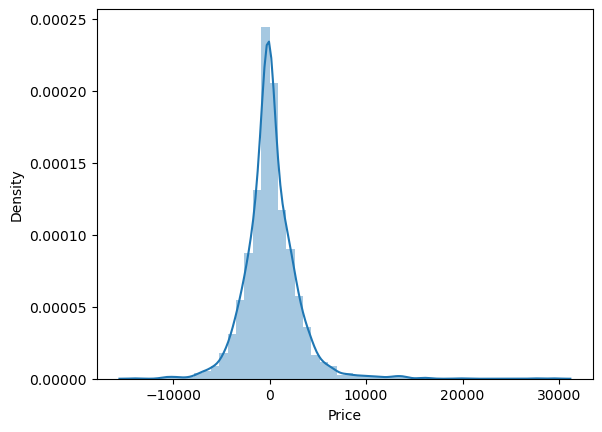

In [264]:
## KNN Model
predict(KNeighborsRegressor())

Model Name : DecisionTreeRegressor()
Training score : 0.9965469691221183
predictions are : [ 4544. 10493.  7229. ...  4990. 10262.  7120.]


r2score is : 0.7697297893153849
adjusted r2score is : 0.7677792082394592
MAE : 848.8738049713193
MSE : 4417320.501434035
RMSE : 2101.7422538061214


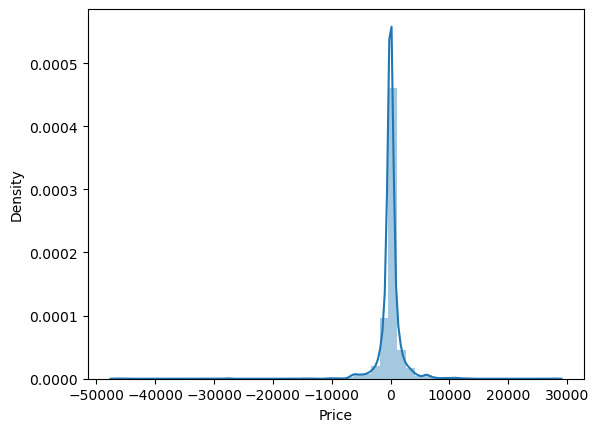

In [266]:
## Decision Tree Model
predict(DecisionTreeRegressor())

Model Name : RandomForestRegressor()
Training score : 0.9816264042763019
predictions are : [ 4188.08 11400.22  7236.87 ...  4914.98 10284.05  5175.21]


r2score is : 0.8823998882757239
adjusted r2score is : 0.8788413260379788
MAE : 715.0076435362226
MSE : 2255946.971803788
RMSE : 1501.9810157934048


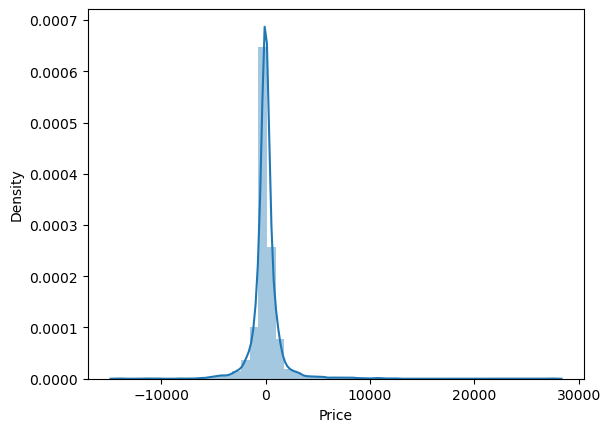

In [268]:
## Randon Forest Regressor Model
predict(RandomForestRegressor())

Model Name : BaggingRegressor()
Training score : 0.9749721743822456
predictions are : [ 4028.6 11512.4  7229.  ...  4923.2 10293.5  5108.6]


r2score is : 0.8715337781889942
adjusted r2score is : 0.868744769874477
MAE : 747.4586837992048
MSE : 2464393.781811234
RMSE : 1569.8387757382075


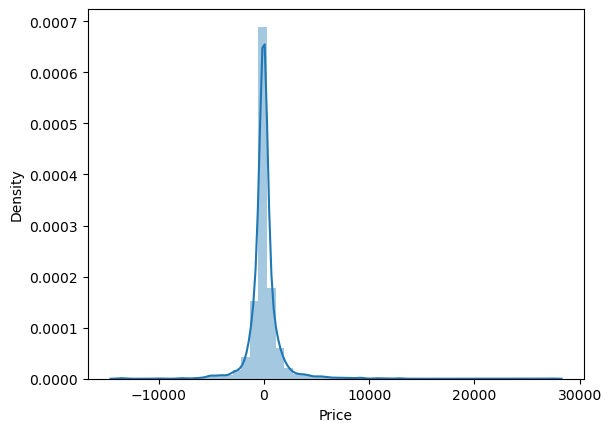

In [270]:
## Bagging Regressor Model
predict(BaggingRegressor())

Model Name : GradientBoostingRegressor()
Training score : 0.8376345809946502
predictions are : [ 5603.18733215 11183.52703214  7456.98674032 ...  4781.87895108
 10699.04315293  5034.79223944]


r2score is : 0.8066489737737713
adjusted r2score is : 0.8081654328934664
MAE : 1273.1766400443191
MSE : 3709092.2424708316
RMSE : 1925.9003718964364


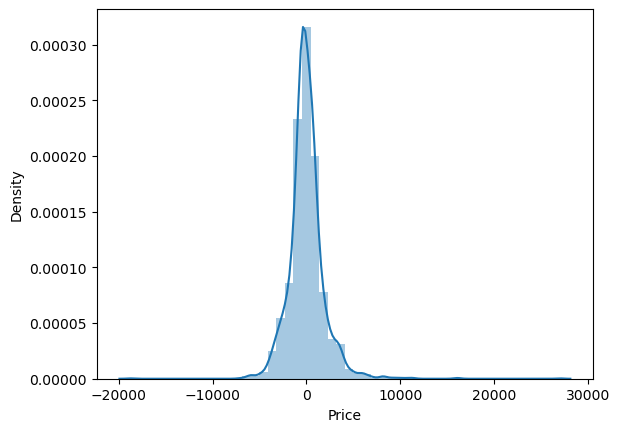

In [272]:
## GradientBoosting Regressor Model
predict(GradientBoostingRegressor())

## HyperParameter Tuning

#### Random Forest

In [274]:
from sklearn.model_selection import RandomizedSearchCV

In [276]:
Random_grid={'n_estimators':[100,120,150,180,200,240],'max_features':['auto','sqrt'],'max_depth':[5,10,15,20],'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4,6],
    'bootstrap': [True, False]}

In [278]:
RF=RandomForestRegressor(random_state=42)
RF_random=RandomizedSearchCV(estimator=RF,param_distributions=Random_grid,n_iter=100,cv=5,verbose=3,n_jobs=-1,random_state=42)

In [280]:
## Training data on randomsearch cv
RF_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 240]},
                   random_state=42, verbose=3)

In [282]:
## Best Params
RF_random.best_params_ 

{'n_estimators': 120,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

Model Name : RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      n_estimators=120, random_state=42)
Training score : 0.9938894935450745
predictions are : [ 4147.36333333 10763.57410797  6863.26666667 ...  4926.5985844
 10655.88052832  5062.9231456 ]


r2score is : 0.8756142580936952
adjusted r2score is : 0.8788413260379788
MAE : 816.3486910899923
MSE : 2386117.1020568884
RMSE : 1544.7061539519057


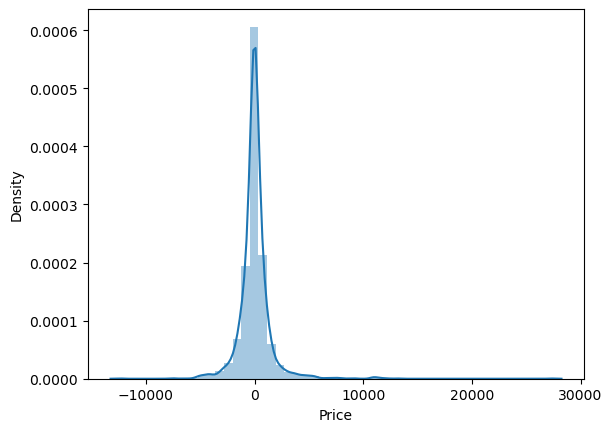

In [288]:
predict(RandomForestRegressor(n_estimators=120,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,max_depth=20,bootstrap=False,random_state=42))

**Model Tuning Summary for Random Forest Regression**

After creating multiple regression models, the Random Forest model achieved an R² score of 0.8823. The model was then tuned to explore if performance could be improved by adjusting hyperparameters such as n_estimators, max_depth, min_samples_split, and others.

**Hyperparameter Tuning**

Before tuning, the model achieved an R² score of 0.8823.
After tuning, the R² score remained at 0.8756, indicating that the model had already reached optimal performance with the initial hyperparameters.

**Performance Insights**

The unchanged R² score suggests that the original hyperparameters were either near optimal or that the model may have reached its performance limit    given the dataset.
The result could also imply that further improvements in model performance may require additional feature engineering, more data, or trying   alternative model architectures rather than hyperparameter adjustments.

**Conclusion**

Despite hyperparameter tuning, the Random Forest regression model maintained a strong performance with an R² score of 0.8756. The current model appears  to be well-tuned with an R² score of 0.8823.

## **Data Analysis Report**

#### **1. Introduction**
 
   The purpose of the analysis is to understand various factors influencing flight fares and to develop a predictive model.

#### **2. Dataset Overview**
 - Number of rows: 10683
 - Number of columns: 11
 - Target Variable: Price (Flight Fare)
 - Features: Airline, Source, Destination, Total_Stops, Duration, Date_of_Journey, Dep_Time, Arrival_Time, Route, Additional_Info.

#### **3. Data Cleaning and Preprocessing**
   
 - **Handling Missing Values**: As there were only 2 missing values, we directly dropped them, as they are very less.
 - **Outlier Treatment**: We chose not to handle outliers in the price column because flight fares can naturally vary widely, reflecting legitimate high       or low prices. Removing these outliers could distort the model's ability to predict future fares accurately.Outliers were observed                      in the Price column, with a few extremely high fares, likely corresponding to business-class or premium economic flights.
 - **Feature Engineering**: In this dataset we features Duration, Date_of_Journey, Dep_Time, Arrival_Time, but in object and we have formatted them to date and time by splitting and converting Date_of_Journey into Day and Month, Dep_Time, Arrival_Time into Hour and Minutes and Duration into Hour and minutes. And categorical features Airline, Source, Destination, Total_Stops, Additional_Info was encoded to numerical features.
   
#### **4. Exploratory Data Analysis (EDA)** 

 - **Airline vs Price**: There are slight differences between each companies on this graph, AirAsia seems to have the cheapest flights when Jet Airways, Multiple camers and Air India are more expensive. However it looks like Jet Airways Business Class are a little more expensive than the Jet Airways Economic Class.
 - **Total_stops vs Price**: The majority of flights are 1 stop and followed by 2 stops and non-stop. Non-stop flights tend to be cheaper, prices are highest for 1-stop flights, followed by 2-stop flights, with non-stop flights generally being the most affordable.
 - **Source vs Price**: Flights departing from Bangalore tend to have the highest prices, followed by other cities, while Chennai appears to offer more affordable options. Among the sources, Delhi has the highest frequency, followed by Kolkata and Bangalore.
 - **Destination vs Price**: New Delhi has the highest flight prices, followed by Cochin, while flights to Delhi are more affordable. In terms of destination frequency, Cochin has the most flights, followed by Bangalore and Delhi.

## **Performance Report for Flight Price Prediction Models**

**Overview of Models Evaluated**

#### Linear Regression

Performance Metrics:
- R² Score: 0.6235227041515081
- Adjusted R² Score: 0.6163308657869327
- Mean Absolute Error (MAE): 1924.3512465326605
- Mean Squared Error (MSE): 7222040.889838384
- Root Mean Squared Error (RMSE): 2687.3855119499294
  
#### Support Vector Regressor (SVR)

Performance Metrics:
- R² Score: 0.003656623389448499
- Adjusted R² Score: -0.009655616350177088
- Mean Absolute Error (MAE): 3539.34231794869
- Mean Squared Error (MSE): 19113058.57099237
- Root Mean Squared Error (RMSE): 4371.848415829667


#### K-Nearest Neighbors

Performance Metrics:
- R² Score: 0.5933780562173638
- Adjusted R² Score: 0.5860411972964275
- Mean Absolute Error (MAE): 1844.3497131931167
- Mean Squared Error (MSE): 7800311.830452518
- Root Mean Squared Error (RMSE): 2792.903834802143


#### Decision Tree Regressor

Performance Metrics:
- R² Score: 0.7724088369351185
- Adjusted R² Score: 0.7677792082394592
- Mean Absolute Error (MAE): 853.5510941151475
- Mean Squared Error (MSE): 4365927.783549324
- Root Mean Squared Error (RMSE): 2089.480266369923

#### Bagging Regressor

Performance Metrics:
- R² Score: 0.8670944853556191
- Adjusted R² Score: 0.868744769874477
- Mean Absolute Error (MAE): 743.6650573613767
- Mean Squared Error (MSE): 2549553.6432906473
- Root Mean Squared Error (RMSE): 1596.7321764437038

#### Gradient Boosting Regressor:

Performance Metrics:
- R² Score: 0.8091062864831604
- Adjusted R² Score: 0.7677792082394592
- Mean Absolute Error (MAE): 1271.7271587588857
- Mean Squared Error (MSE): 3661953.1106771575
- Root Mean Squared Error (RMSE): 1913.6230325425008


#### Random Forest Regressor:

Performance Metrics:
- R² Score: 0.8823998882757239
- Adjusted R² Score: 0.8788413260379788
- Mean Absolute Error (MAE):  717.0869156309751
- Mean Squared Error (MSE): 2322088.557425377
- Root Mean Squared Error (RMSE): 1523.8400695038101

## Model Performance Comparison

#### Best Model: Random Forest Regressor

The Random Forest Regressor exhibited the highest accuracy and lowest error metrics compared to other models. It achieved the highest R² score - 0.8823998882757239, indicating that it explains the most variance in the target variable, and had the lowest MAE - 717.0869156309751, MSE - 2322088.557425377, and RMSE - 1523.8400695038101, suggesting it provides the most reliable predictions.

## Conclusion

The Random Forest Regressor has demonstrated the best performance among the evaluated models and is recommended for use in production to predict future flight prices. Its accuracy and robustness make it well-suited for helping customers plan their journeys and make informed decisions.



## Report on Challenges faced

**Summary of Challenges Faced While working on project**

When working with time and date features (Duration, Date_of_Journey, Dep_Time, Arrival_Time) were stored as object (string) types, which presents several challenges when attempting to convert them into a usable datetime format. Below is a summary of the common challenges encountered during the conversion process and hyperparameter tuning:

**1. Separating Date and Time**
 - Problem: In this date and time are stored in a single string, which can make conversion to separate date and time objects difficult.Directly converting combined date-time strings might not provide the needed granularity for feature engineering.
 - Solution: Split the date and time components, converting them separately into datetime or time objects, and create additional features like day, month, hour and minutes. Used Python's pd.to_datetime() with the format parameter or regular expressions to ensure proper format parsing.

**2. Feature Redundancy**
 - Problem: Some features in the dataset had redundant information. Route directly corresponds to the value in Total_Stops, the two features are essentially conveying the same information, albeit in different formats.
 - Solution: Redundant features can lead to overfitting, making the model more complex without improving performance. Proper feature selection or dimensionality reduction methods are needed to avoid this, so we dropped the Route feature.

**3. Hyperparameter tuning**
Computational Cost and Time-Consumption
 - Problem: Hyperparameter tuning Random Search method was computationally expensive and time-consuming. It  took a long time to evaluate all possible parameter combinations, which lead to delays in the model development cycle.
 - Solution: As mentioned in the model tuning report that after creating multiple regression models, the Random Forest model achieved an R² score of 0.8823. The model was then tuned to explore if performance could be improved by adjusting hyperparameters such as n_estimators, max_depth, min_samples_split, and others, Before tuning, the model achieved an R² score of 0.8823. After tuning, the R² score remained at 0.8756, indicating that the model had already reached optimal performance with the initial hyperparameters.
